<a href="https://colab.research.google.com/github/VaibhavShintre/Introduction-to-Data-Science/blob/main/CSC_442_Project_Group_10_Austin_Analysis_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Names: Lavan Aditya, Amrish Naranappa, Vaibhav Shintre, Austin Bressler

In [2]:
# install the neccesary libraries
from google.colab import files
import io
import pandas as pd
import numpy as np

# install visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# upload the data file
uploaded = files.upload()

Saving student-por.csv to student-por.csv
Saving student-mat.csv to student-mat.csv


In [3]:
# read in the database
StudentMath = pd.read_csv('student-mat.csv', delimiter=';')
StudentPort = pd.read_csv('student-por.csv', delimiter=';')

# checking if the files were read correctly
print(StudentMath)
print(StudentPort)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [4]:
# Dropping the 'G1' and 'G2' columns from the StudentMath DataFrame to keep only 'G3' and other relevant columns
mathG3Only = StudentMath.drop(['G1', 'G2'], axis=1)

# Dropping the 'G1' and 'G2' columns from the StudentPort DataFrame to keep only 'G3' and other relevant columns
portG3Only = StudentPort.drop(['G1', 'G2'], axis=1)

# Rename columns in the math dataset to clearly indicate these values come from the math file.
Sm_temp = mathG3Only.rename(columns={'G3': 'MG3', "paid": "paidM", "failures": "failuresM", "absences": "absencesM"}, inplace=False)
print(Sm_temp)
# Rename columns in the Portuguese dataset to indicate they belong to the Portugal file.
sp_temp = portG3Only.rename(columns={'G3': 'PG3', "paid": "paidP", "failures": "failuresP", "absences": "absencesP"}, inplace=False)
print(sp_temp)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout

In [5]:
# performing an inner join between Sm_temp and sp_temp on their common columns
sm_inter = pd.merge(Sm_temp, sp_temp, 'inner')

# printing the result to verify that there is a correct amount of matching files.
print(sm_inter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      370 non-null    object
 1   sex         370 non-null    object
 2   age         370 non-null    int64 
 3   address     370 non-null    object
 4   famsize     370 non-null    object
 5   Pstatus     370 non-null    object
 6   Medu        370 non-null    int64 
 7   Fedu        370 non-null    int64 
 8   Mjob        370 non-null    object
 9   Fjob        370 non-null    object
 10  reason      370 non-null    object
 11  guardian    370 non-null    object
 12  traveltime  370 non-null    int64 
 13  studytime   370 non-null    int64 
 14  failuresM   370 non-null    int64 
 15  schoolsup   370 non-null    object
 16  famsup      370 non-null    object
 17  paidM       370 non-null    object
 18  activities  370 non-null    object
 19  nursery     370 non-null    object
 20  higher    

We will be working with these variables to see how they improve final grade.

schoolsup - extra educational support, yes or no

famsup - family educational support, yes or no

paid - extra paid classes within the course subject, yes or no

In [6]:
# Make paidM into a category
sm_inter["paidMCat"] = sm_inter["paidM"].astype("category")

# Make paidP into a category
sm_inter["paidPCat"] = sm_inter["paidP"].astype("category")

# Make farmsup into a category
sm_inter["famsupCat"] = sm_inter["famsup"].astype("category")

# Make farmsup into a category
sm_inter["schoolsupCat"] = sm_inter["schoolsup"].astype("category")

# check to see if all categories were created correctly
sm_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   school        370 non-null    object  
 1   sex           370 non-null    object  
 2   age           370 non-null    int64   
 3   address       370 non-null    object  
 4   famsize       370 non-null    object  
 5   Pstatus       370 non-null    object  
 6   Medu          370 non-null    int64   
 7   Fedu          370 non-null    int64   
 8   Mjob          370 non-null    object  
 9   Fjob          370 non-null    object  
 10  reason        370 non-null    object  
 11  guardian      370 non-null    object  
 12  traveltime    370 non-null    int64   
 13  studytime     370 non-null    int64   
 14  failuresM     370 non-null    int64   
 15  schoolsup     370 non-null    object  
 16  famsup        370 non-null    object  
 17  paidM         370 non-null    object  
 18  activities

Let's explore how forms of extra help such as help from family, school, or paid tutoring change the expected grade. We want to see how much these factors improve the final grade if at all, and if they seem to be good predictors of final grade once a model uses them. First however we will look at the average grade with no sorting.

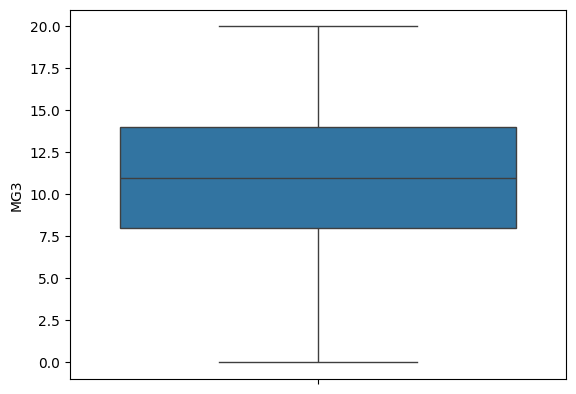

Math Grades:
Math mean:10.464864864864865
Math std:4.608829526277274
Math Medial:11.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:14.0 



In [7]:
# let's compare final Mathematic grades for both classes
sns.boxplot(y="MG3", data=sm_inter)
plt.show()

# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Math Grades:")
print(f"Math mean:{sm_inter.MG3.mean()}")
print(f"Math std:{sm_inter.MG3.std()}")
print(f"Math Medial:{sm_inter.MG3.median()}")
print(f"Math 1/4 Quartile: {sm_inter.MG3.quantile(q=0.25)}, 3/4 Quartile:{sm_inter.MG3.quantile(q=0.75)} \n")

Average mean for math is about 10.5, we would want to see a signficant increase from 10.5 for any group here to show that they are effective grade boosters.

We will now conduct the same analysis for portuguese

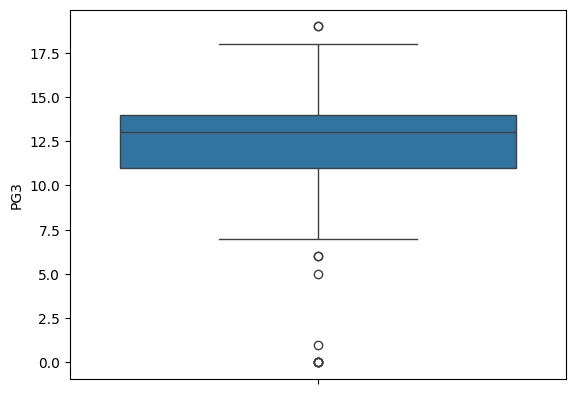

Port Grades:
Port mean:12.554054054054054
Port std:2.943652819404742
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:14.0 



In [8]:
# let's compare final Portuguese grades for both classes
sns.boxplot(y="PG3", data=sm_inter)
plt.show()

# Get the Mean, Standard Deviation, Median, and quartiles for Portuguese grade
print("Port Grades:")
print(f"Port mean:{sm_inter.PG3.mean()}")
print(f"Port std:{sm_inter.PG3.std()}")
print(f"Port Medial:{sm_inter.PG3.median()}")
print(f"Port 1/4 Quartile: {sm_inter.PG3.quantile(q=0.25)}, 3/4 Quartile:{sm_inter.PG3.quantile(q=0.75)} \n")

Average mean for Protuguese is about 12.5, we would want to see a signficant increase from 12.5 for any group here to show that they are effective grade boosters.

We should now look first at each different group and see how the average grade looks
when we group by having specific form of extra help.

<ipython-input-9-9755b0652efb>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="famsupCat", y="MG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


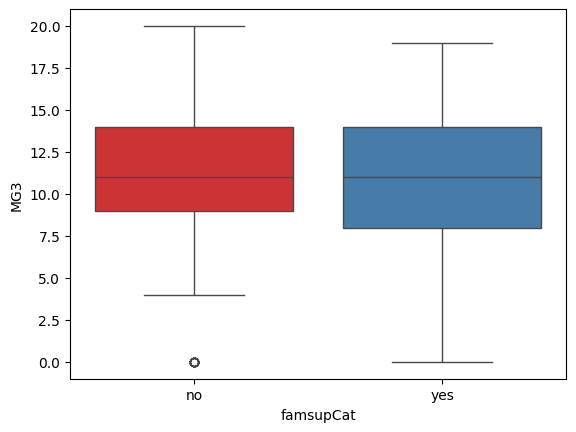

No Family Help:
Math mean:10.762589928057555
Math std:4.658765672524433
Math Medial:11.0
Math 1/4 Quartile: 9.0, 3/4 Quartile:14.0 

Yes Family Help:
Math mean:10.285714285714286
Math std:4.579321602093886
Math Medial:11.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:14.0


In [9]:
# let's compare final Mathematic grades for both classes by famsup
sns.boxplot(x="famsupCat", y="MG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no help
NoFHelp = sm_inter.query("famsupCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Family Help:")
print(f"Math mean:{NoFHelp.MG3.mean()}")
print(f"Math std:{NoFHelp.MG3.std()}")
print(f"Math Medial:{NoFHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {NoFHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{NoFHelp.MG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
YesFHelp = sm_inter.query("famsupCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Family Help:")
print(f"Math mean:{YesFHelp.MG3.mean()}")
print(f"Math std:{YesFHelp.MG3.std()}")
print(f"Math Medial:{YesFHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {YesFHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{YesFHelp.MG3.quantile(q=0.75)}")

<ipython-input-10-bbaa8dbc8350>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="famsupCat", y="PG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


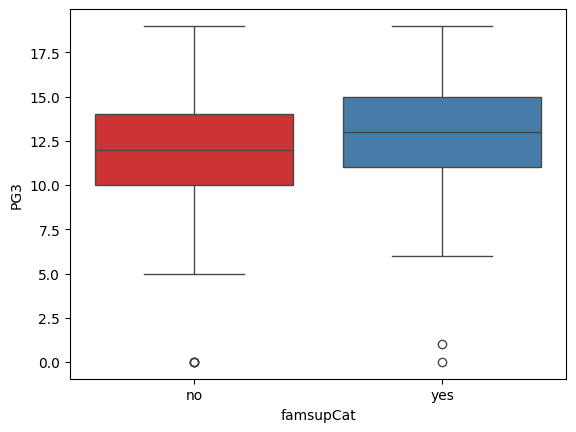

No Family Help:
Port mean:12.194244604316546
Port std:3.3640850293449343
Port Medial:12.0
Port 1/4 Quartile: 10.0, 3/4 Quartile:14.0 

Yes Family Help:
Port mean:12.770562770562771
Port std:2.643153441761355
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:15.0


In [10]:
# let's compare Portuguese final grades for both classes by famsup
sns.boxplot(x="famsupCat", y="PG3", hue="famsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Family Help:")
print(f"Port mean:{NoFHelp.PG3.mean()}")
print(f"Port std:{NoFHelp.PG3.std()}")
print(f"Port Medial:{NoFHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {NoFHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{NoFHelp.PG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Family Help:")
print(f"Port mean:{YesFHelp.PG3.mean()}")
print(f"Port std:{YesFHelp.PG3.std()}")
print(f"Port Medial:{YesFHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {YesFHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{YesFHelp.PG3.quantile(q=0.75)}")

Family help actually lowered the average math grade by a small amount, but also increased the average portuguese grade by a small amount, family help doesn't seem to make a difference. Not getting help from family also seemed to reduce the standard deviation greatly.

<ipython-input-11-d63b45b493fc>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="schoolsupCat", y="MG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


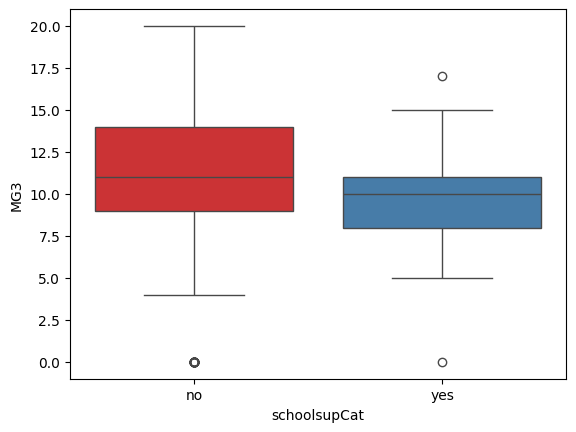

No School Help:
Math mean:10.616822429906541
Math std:4.8016498332859845
Math Medial:11.0
Math 1/4 Quartile: 9.0, 3/4 Quartile:14.0 

Yes School Help:
Math mean:9.46938775510204
Math std:2.9018818665388393
Math Medial:10.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:11.0


In [11]:
# let's compare final Mathematic grades for both classes by schoolsup
sns.boxplot(x="schoolsupCat", y="MG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no school help
NoSHelp = sm_inter.query("schoolsupCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No School Help:")
print(f"Math mean:{NoSHelp.MG3.mean()}")
print(f"Math std:{NoSHelp.MG3.std()}")
print(f"Math Medial:{NoSHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {NoSHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{NoSHelp.MG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
YesSHelp = sm_inter.query("schoolsupCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes School Help:")
print(f"Math mean:{YesSHelp.MG3.mean()}")
print(f"Math std:{YesSHelp.MG3.std()}")
print(f"Math Medial:{YesSHelp.MG3.median()}")
print(f"Math 1/4 Quartile: {YesSHelp.MG3.quantile(q=0.25)}, 3/4 Quartile:{YesSHelp.MG3.quantile(q=0.75)}")

<ipython-input-12-c5008eed5d01>:2: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="schoolsupCat", y="PG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))


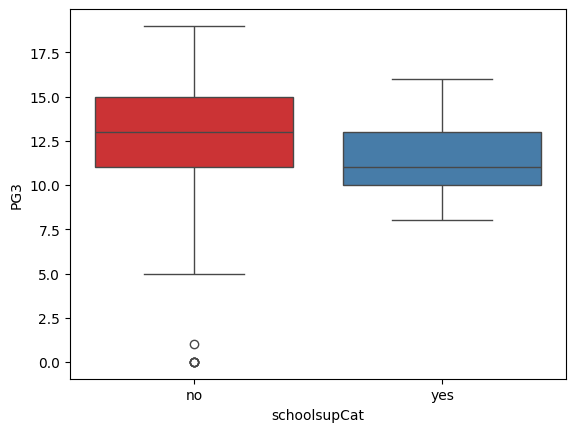

No School Help:
Port mean:12.71651090342679
Port std:3.0655354814717115
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:15.0 

Yes School Help:
Port mean:11.489795918367347
Port std:1.621758934248961
Port Medial:11.0
Port 1/4 Quartile: 10.0, 3/4 Quartile:13.0


In [12]:
# let's compare Portuguese final grades for both classes by Schoolsup
sns.boxplot(x="schoolsupCat", y="PG3", hue="schoolsupCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No School Help:")
print(f"Port mean:{NoSHelp.PG3.mean()}")
print(f"Port std:{NoSHelp.PG3.std()}")
print(f"Port Medial:{NoSHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {NoSHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{NoSHelp.PG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by help
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes School Help:")
print(f"Port mean:{YesSHelp.PG3.mean()}")
print(f"Port std:{YesSHelp.PG3.std()}")
print(f"Port Medial:{YesSHelp.PG3.median()}")
print(f"Port 1/4 Quartile: {YesSHelp.PG3.quantile(q=0.25)}, 3/4 Quartile:{YesSHelp.PG3.quantile(q=0.75)}")

Surprisingly getting help from school directly doesn't seem to improve the average grade at all, in fact it lowered the average grade for both grades by a whole point implying that needing help from the school meant a student was expected to do worse on average. Getting help also greatly reduced the standard deviation implying the range of grades you could expect from a student getting help was much smaller.

<ipython-input-13-921c136dccb2>:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="paidMCat", y="MG3", hue="paidMCat", data=sm_inter, palette=sns.color_palette("Set1"))


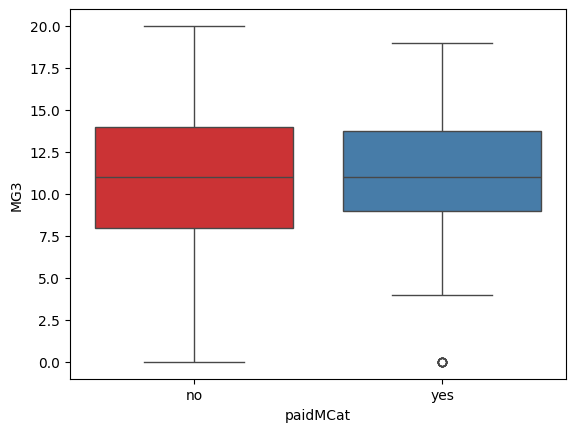

No Paid Math Tutoring:
Math mean:10.071428571428571
Math std:5.174394551477399
Math Medial:11.0
Math 1/4 Quartile: 8.0, 3/4 Quartile:14.0 

Yes Paid Math Tutoring:
Math mean:10.908045977011493
Math std:3.841158856651955
Math Medial:11.0
Math 1/4 Quartile: 9.0, 3/4 Quartile:13.75


In [13]:
# let's compare final Mathematic grades for both classes by PaidM
# We won't apply PaidM to their portuguese grade since math tutoring doesn't
# apply to portuguese
sns.boxplot(x="paidMCat", y="MG3", hue="paidMCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no paid math tutoring
NoPaidM = sm_inter.query("paidMCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Paid Math Tutoring:")
print(f"Math mean:{NoPaidM.MG3.mean()}")
print(f"Math std:{NoPaidM.MG3.std()}")
print(f"Math Medial:{NoPaidM.MG3.median()}")
print(f"Math 1/4 Quartile: {NoPaidM.MG3.quantile(q=0.25)}, 3/4 Quartile:{NoPaidM.MG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by Math Tutoring
YesPaidM = sm_inter.query("paidMCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Paid Math Tutoring:")
print(f"Math mean:{YesPaidM.MG3.mean()}")
print(f"Math std:{YesPaidM.MG3.std()}")
print(f"Math Medial:{YesPaidM.MG3.median()}")
print(f"Math 1/4 Quartile: {YesPaidM.MG3.quantile(q=0.25)}, 3/4 Quartile:{YesPaidM.MG3.quantile(q=0.75)}")

Tutoring for a Math Class has surprisingly little effect as it only raised the average grade by less than half a point. furthermore it brought the standard deviation down meaning that students ended up producing more consistent results when tutored.

<ipython-input-14-9fc3dbb49b2b>:4: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(x="paidPCat", y="PG3", hue="paidPCat", data=sm_inter, palette=sns.color_palette("Set1"))


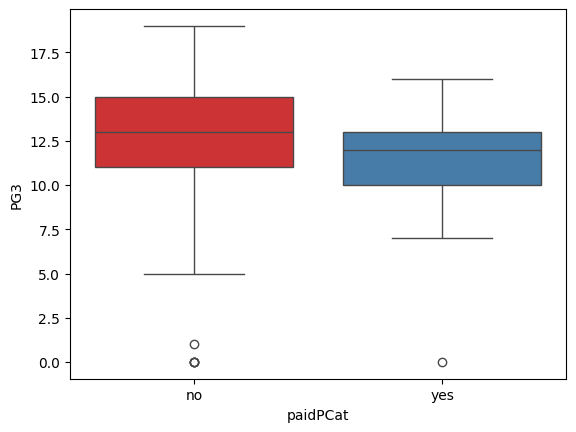

No Paid Port Tutoring:
Port mean:12.660869565217391
Port std:2.900141205027801
Port Medial:13.0
Port 1/4 Quartile: 11.0, 3/4 Quartile:15.0 

Yes Paid Port Tutoring:
Port mean:11.08
Port std:3.2005207909547058
Port Medial:12.0
Port 1/4 Quartile: 10.0, 3/4 Quartile:13.0


In [14]:
# let's compare final Portuguese grades for both classes by PaidP
# We won't apply PaidP to their math grade since Portuguese tutoring doesn't
# apply to math
sns.boxplot(x="paidPCat", y="PG3", hue="paidPCat", data=sm_inter, palette=sns.color_palette("Set1"))
plt.show()

# Let's see the exact value of various important values like mean are effected
# by no paid Port tutoring
NoPaidP = sm_inter.query("paidPCat == 'no'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("No Paid Port Tutoring:")
print(f"Port mean:{NoPaidP.PG3.mean()}")
print(f"Port std:{NoPaidP.PG3.std()}")
print(f"Port Medial:{NoPaidP.PG3.median()}")
print(f"Port 1/4 Quartile: {NoPaidP.PG3.quantile(q=0.25)}, 3/4 Quartile:{NoPaidP.PG3.quantile(q=0.75)} \n")

# Let's see the exact value of various important values like mean are effected
# by Port Tutoring
YesPaidP = sm_inter.query("paidPCat == 'yes'")
# Get the Mean, Standard Deviation, Median, and quartiles for math grade
print("Yes Paid Port Tutoring:")
print(f"Port mean:{YesPaidP.PG3.mean()}")
print(f"Port std:{YesPaidP.PG3.std()}")
print(f"Port Medial:{YesPaidP.PG3.median()}")
print(f"Port 1/4 Quartile: {YesPaidP.PG3.quantile(q=0.25)}, 3/4 Quartile:{YesPaidP.PG3.quantile(q=0.75)}")

Tutoring for a Portuguese Class also has a surprisingly negative effect, it brought the mean by down 1.5 points from the expected average implying that a student getting paid tutoring could on average be expected to do worse than a student not receiving tutoring. However it did also reduce the standard deviation making their final grade more predictable.

It is surprising that tutoring indicates a lower grade overall than no tutoring. Perhaps it only really helps students who are failing but does not help students excel if they are already doing fine thus bringing a low grade to a better but still not fantastic grade.

The conclusion seems to be that these methods of extra help don't help a student excel in class, and are not generally strong predictors of final grade on their own unlike what one may expect on the outset.

An example query with response rows

In [15]:
# Let's see the exact value of various important values like mean are effected
# by yes school help
YesSHelpB = sm_inter.query("schoolsupCat == 'yes'")
print(YesSHelpB.head())
print(YesSHelpB.shape)
print(sm_inter.shape)
YesSHelpB.to_csv('schoolout.csv')

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home  teacher   
2      GP   F   15       U     LE3       T     1     1   at_home    other   
7      GP   F   17       U     GT3       A     4     4     other  teacher   
17     GP   F   16       U     GT3       T     3     3     other    other   
24     GP   F   15       R     GT3       T     2     4  services   health   

    ... absencesM MG3  failuresP  paidP  absencesP PG3 paidMCat paidPCat  \
0   ...         6   6          0     no          4  11       no       no   
2   ...        10  10          0     no          6  12      yes       no   
7   ...         6   6          0     no          2  13       no       no   
17  ...         4  10          0     no          2  14       no       no   
24  ...         2   8          0     no          2  10      yes       no   

   famsupCat schoolsupCat  
0         no          yes  
2         no          ye

# **PAST THIS POINT IS HW7 WORK, DO NOT INCLUDE IN GRADING FOR HW 6**

The type of model I want to do is a regressor tree in order to try and predict a student's grade based on the type of extra help they are getting.

In [16]:
# import the decision tree library from the scikit learn
from sklearn.tree import DecisionTreeRegressor
# for training and testing
from sklearn.model_selection import train_test_split
# get the other type of tree
import sklearn.tree as tree
# get the ability to plot our results
import matplotlib.pyplot as plt
import seaborn as sns
# import the metrics for regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# cross validation if we need it
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

We need to turn our categorical variables into ints

In [39]:
# convert all of these variables into integer form
sm_inter["paidMInt"] = sm_inter['paidMCat'].cat.codes
sm_inter["paidPInt"] = sm_inter['paidPCat'].cat.codes
sm_inter["famsupInt"] = sm_inter['famsupCat'].cat.codes
sm_inter["schoolsupInt"] = sm_inter['schoolsupCat'].cat.codes
# verify the output looks good
print(sm_inter["paidMInt"])
print(sm_inter["paidM"])

print(sm_inter["paidPInt"])
print(sm_inter["paidP"])

print(sm_inter["famsupInt"] )
print(sm_inter["famsup"] )

print(sm_inter["schoolsupInt"])
print(sm_inter["schoolsup"])

0      0
1      0
2      1
3      1
4      1
      ..
365    0
366    1
367    0
368    0
369    0
Name: paidMInt, Length: 370, dtype: int8
0       no
1       no
2      yes
3      yes
4      yes
      ... 
365     no
366    yes
367     no
368     no
369     no
Name: paidM, Length: 370, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
365    0
366    0
367    0
368    0
369    0
Name: paidPInt, Length: 370, dtype: int8
0      no
1      no
2      no
3      no
4      no
       ..
365    no
366    no
367    no
368    no
369    no
Name: paidP, Length: 370, dtype: object
0      0
1      1
2      0
3      1
4      1
      ..
365    0
366    1
367    0
368    0
369    0
Name: famsupInt, Length: 370, dtype: int8
0       no
1      yes
2       no
3      yes
4      yes
      ... 
365     no
366    yes
367     no
368     no
369     no
Name: famsup, Length: 370, dtype: object
0      1
1      0
2      1
3      0
4      0
      ..
365    0
366    0
367    0
368    0
369    0
Name: s

First we need to create the X and y splits so we can prepare for cross validation

In [18]:
#separate features and response varaible
X = sm_inter[["famsupInt","schoolsupInt","paidPInt","paidMInt"]].values
y = sm_inter[["PG3","MG3"]].values
print(X)
print(y)

[[0 1 0 0]
 [1 0 0 0]
 [0 1 0 1]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[11  6]
 [11  6]
 [12 10]
 [14 15]
 [13 10]
 [13 15]
 [13 11]
 [13  6]
 [17 19]
 [13 15]
 [14  9]
 [13 12]
 [12 14]
 [13 11]
 [15 16]
 [17 14]
 [14 14]
 [14 10]
 [ 7  5]
 [12 10]
 [14 15]
 [12 15]
 [14 16]
 [10 12]
 [10  8]
 [12  8]
 [12 11]
 [11 15]
 [13 11]
 [12 11]
 [11 12]
 [15 17]
 [15 16]
 [12 12]
 [12 15]
 [11  6]
 [14 18]
 [13 15]
 [12 11]
 [12 13]
 [10 11]
 [11 12]
 [15 18]
 [10 11]
 [11  9]
 [11  6]
 [13 11]
 [17 20]
 [13 14]
 [12  7]
 [13 13]
 [16 13]
 [ 9 10]
 [12 11]
 [13 13]
 [12 10]
 [15 15]
 [16 15]
 [14  9]
 [16 16]
 [16 11]
 [16 11]
 [10  9]
 [13  9]
 [12 10]
 [16 15]
 [12 12]
 [10  6]
 [11  8]
 [15 16]
 [11 15]
 [10 10]
 [11  5]
 [14 14]
 [11 11]
 [11 10]
 [11 10]
 [13 11]
 [10 10]
 [11  5]
 [12 12]
 [ 9 11]
 [11  6]
 [13 15]
 [12 10]
 [12  8]
 [11  6]
 [15 14]
 [11 10]
 [10  7]
 [11  8]
 [13 18]
 [12  6]
 [14 10]
 [12 14]
 [13 10]
 [11 15]
 [12 10]
 [13 14]
 [13  8]
 [ 8  5]
 [16 17]
 [12 14]
 

Now that we have the two splits let's try and do cross validation, we'll do cross validation on max depth.

In [26]:
# let's try several maximum depths
depth_values = [i for i in range (2,11)]
scores = []

Regressor = DecisionTreeRegressor(max_depth=8)

# now we will set up the cross validation and collect scores
for d in depth_values:
  Regressor = DecisionTreeRegressor(max_depth=d)
  # use crossval to fit
  cross_val_scores = cross_val_score(Regressor, X, y, cv=5, scoring='r2')
  scores.append(cross_val_scores.mean())

# display the depth values and the scores in a table
df = pd.DataFrame({'max depth': depth_values, 'scores': scores})
print(df)
# we will go with a max depth of 3 because it is the first depth with the
# highest value r squared score even though it's negative

   max depth    scores
0          2 -0.100128
1          3 -0.097708
2          4 -0.167534
3          5 -0.167534
4          6 -0.167534
5          7 -0.167534
6          8 -0.167534
7          9 -0.167534
8         10 -0.167534


Thsi tree is absolutely awful but the max depth of 3 gives the least bad result so we will fit the tree based on a max depth of three and see what it gives

In [28]:
# refit the tree
Regressor = DecisionTreeRegressor(max_depth=3)
# divide into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
Regressor.fit(X_train, y_train)
# print the tree
feature_cols = ["paidMInt","paidPInt","famsupInt", "schoolsupInt"]
importances = pd.DataFrame({"feature": feature_cols,"importance": np.round(Regressor.feature_importances_,3)})

#here our our importances
importances = importances.sort_values("importance",ascending=False).set_index("feature")
importances

,importance
feature,
famsupInt,0.479
paidPInt,0.241
schoolsupInt,0.224
paidMInt,0.056


It appears help from the family was considered the most important factor for this tree while paid tutoring for math was the least important factor. We will now vizualize the tree to see what it looks like.

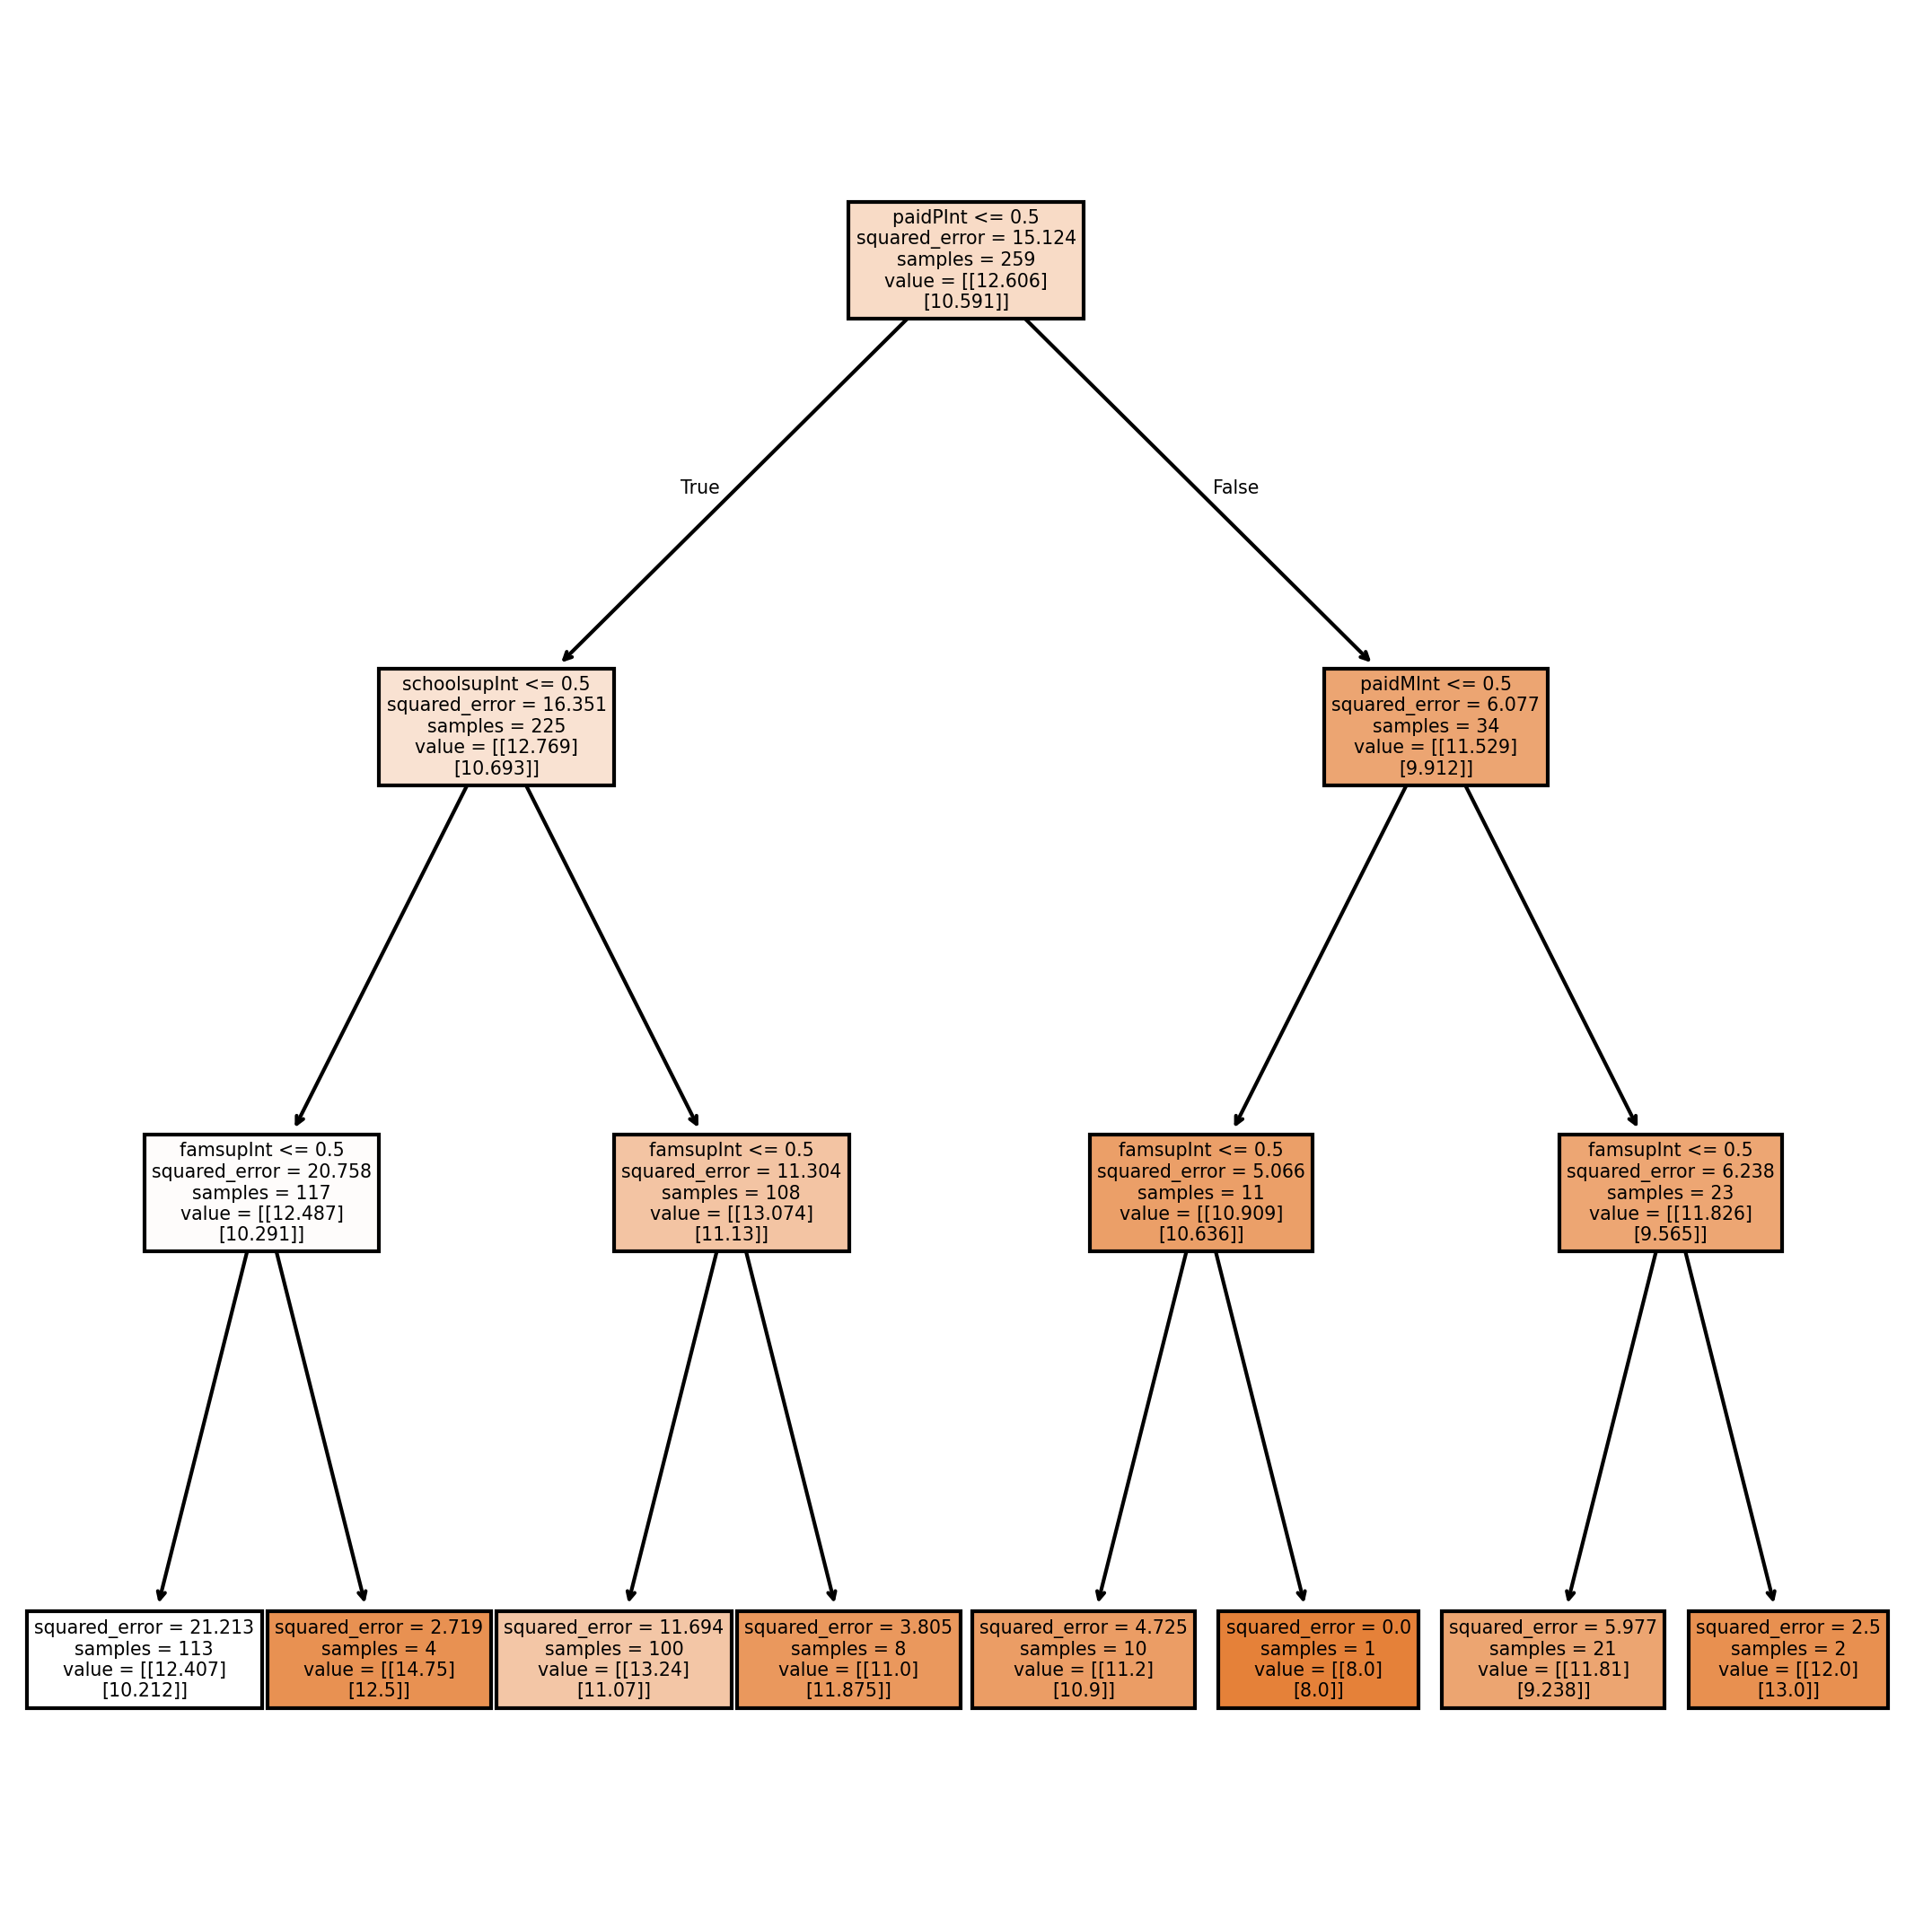

In [30]:
# plot the tree
plt.figure(figsize=(9,9), dpi = 300)
tree.plot_tree(Regressor, feature_names = feature_cols, filled = True);

The tree looks like it could benefit from pruning, it has too many path splits as it's using all of them. Let's employ cost complexity to reduce the number of paths

In [33]:
# acquire the impurities and alphas to supply to the new fit
path = Regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# rebuild the model with different ccp alphas
# We'll keep the same max depth as before
model = []
for ccp_alpha in ccp_alphas:
    rlf = DecisionTreeRegressor(max_depth=3, ccp_alpha=ccp_alpha)
    rlf.fit(X_train, y_train)
    model.append(rlf)
print("Number of nodes in the last tree: {} with ccp_alpha is {}".format(
      model[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree: 1 with ccp_alpha is 0.12243199203227739


Now we will look at a chart of scores for our tree to determine the best model for complexity

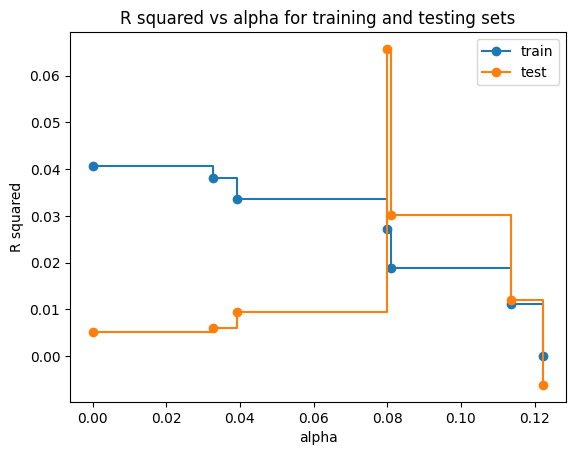

In [34]:
# compare the training and test scores for each of the models
train_scores = [models.score(X_train, y_train) for models in model]
test_scores = [models.score(X_test, y_test) for models in model]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R squared")
ax.set_title("R squared vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

The best alpha in terms of trade off seems to be around 0.08, so we will be using that to fit our tree.

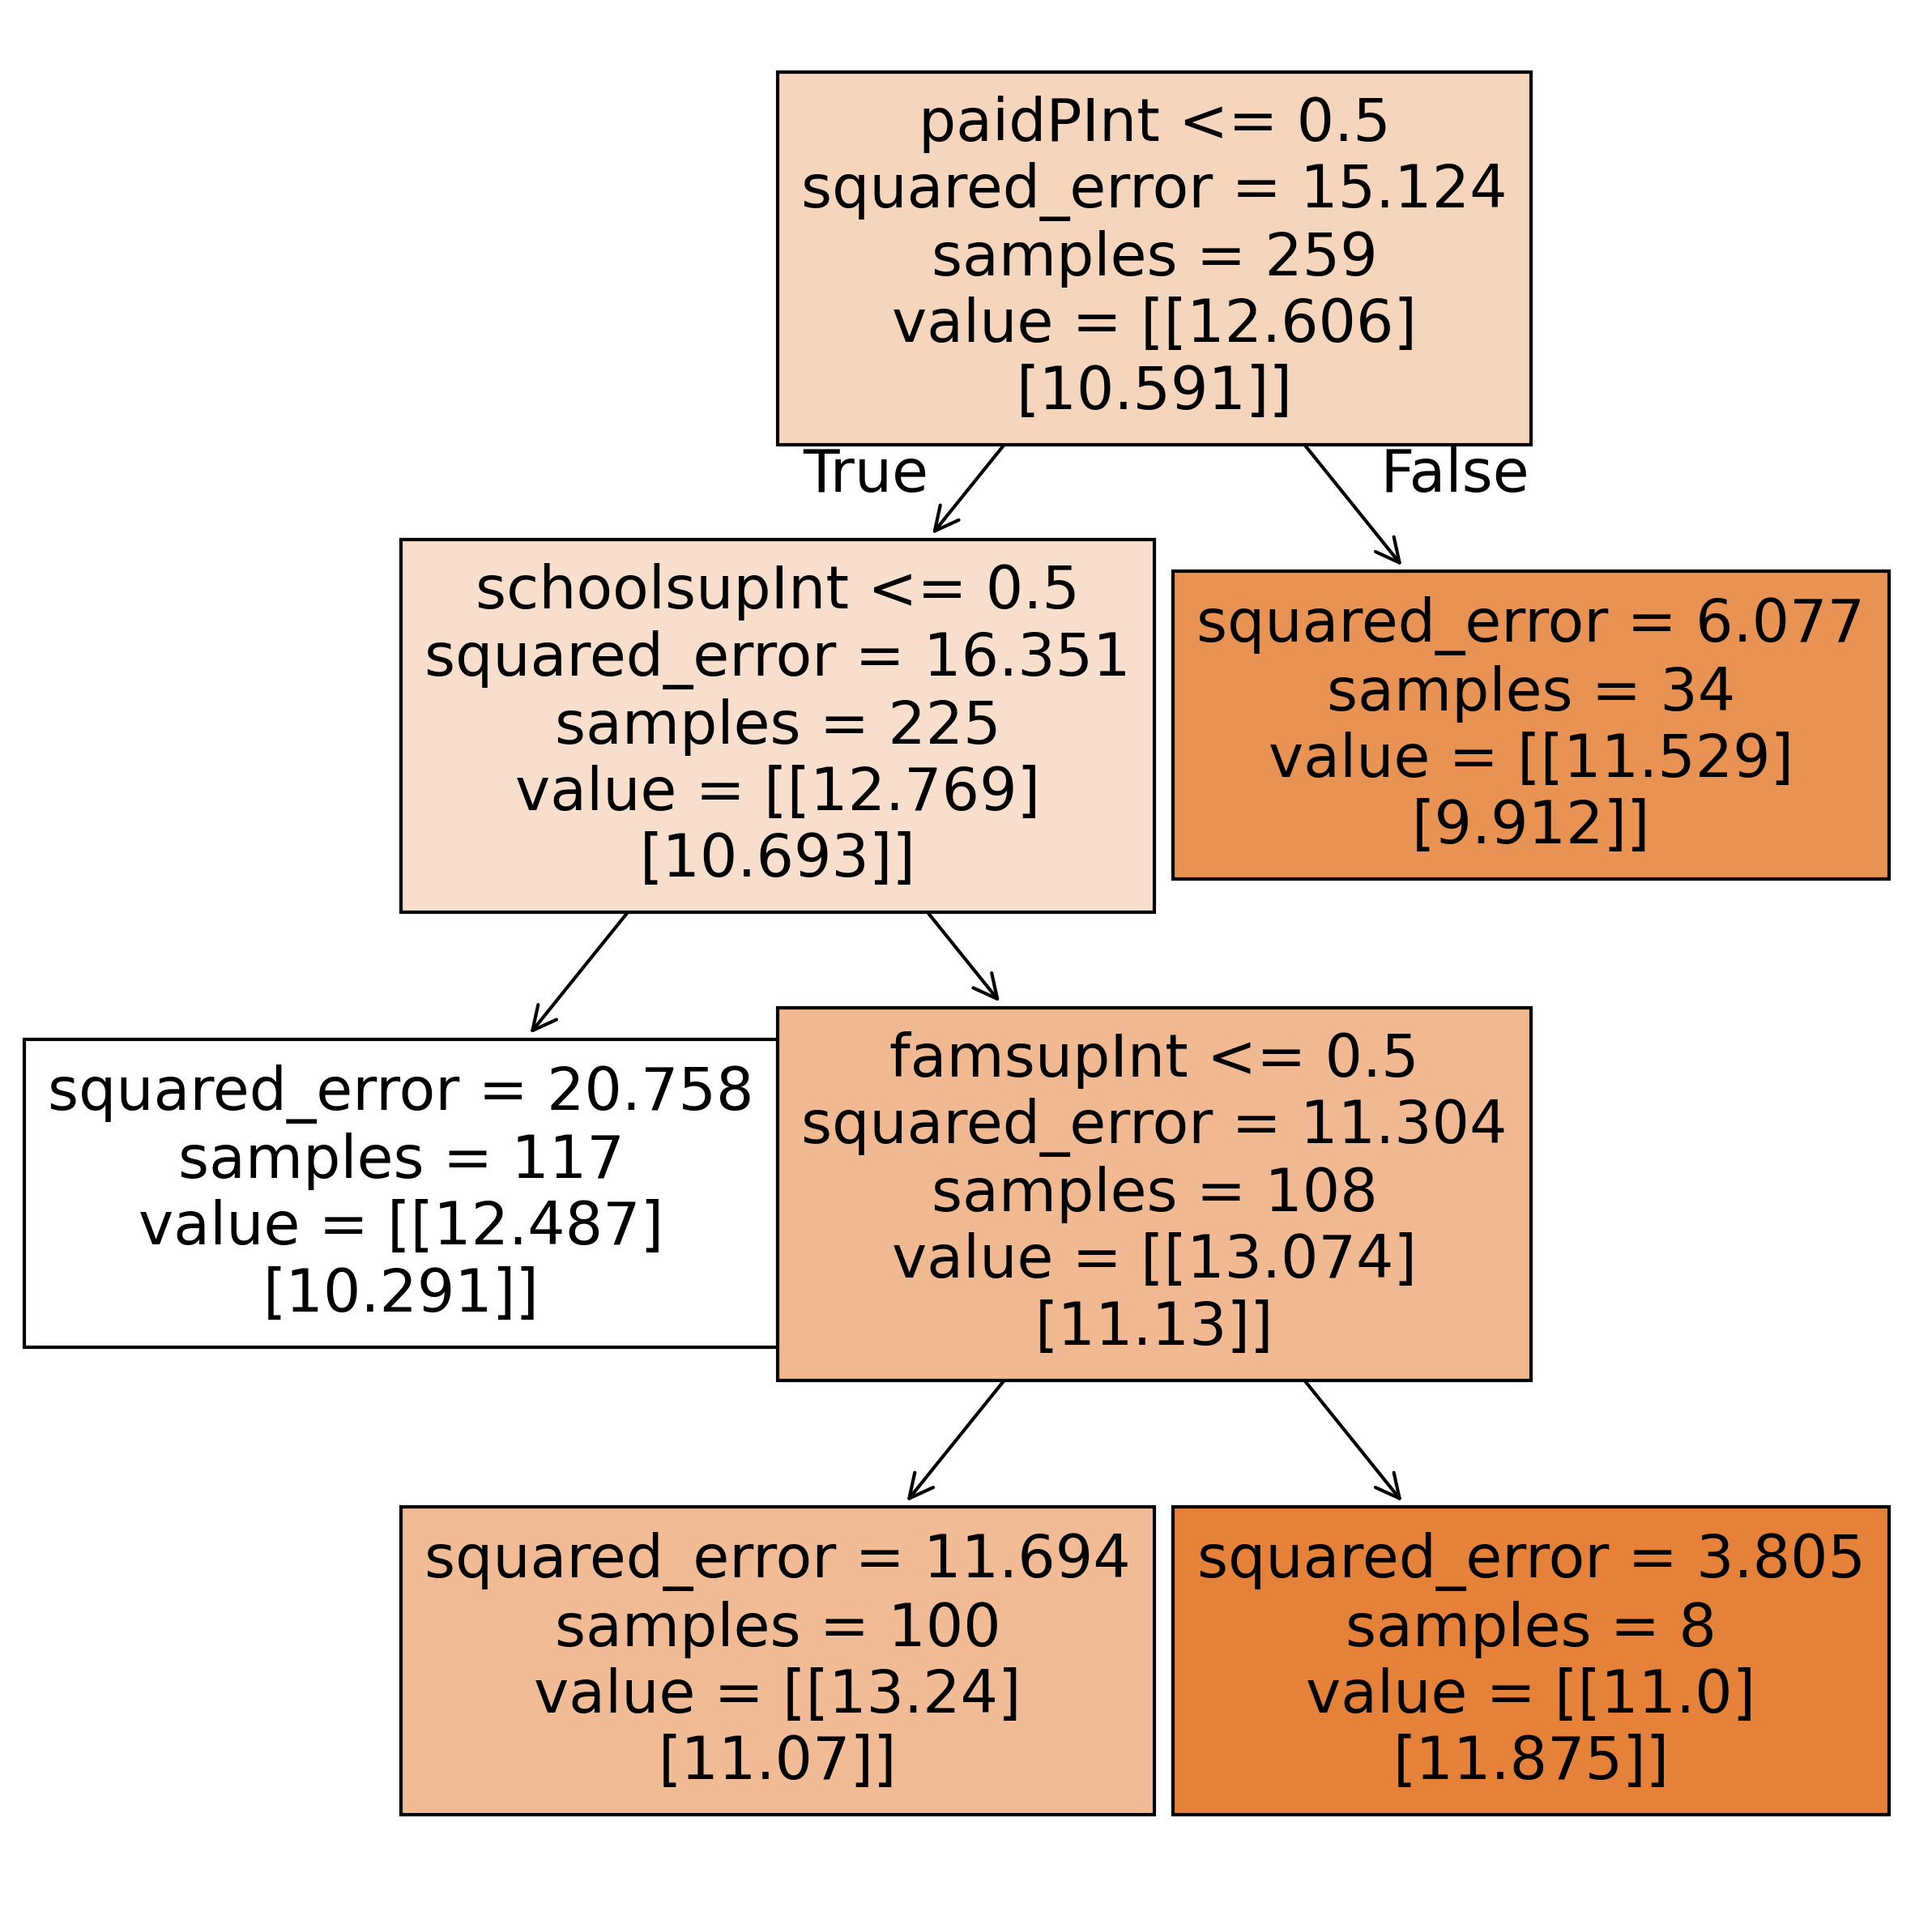

In [36]:
# Refit our model to the new form
Regressor = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.08)
Regressor.fit(X_train, y_train)
plt.figure(figsize=(10,10), dpi = 300)
tree.plot_tree(Regressor, feature_names = feature_cols, filled = True);

We now get A much more reasonable tree with what should be better prediction scores. Let's score our tree to see how it did

In [38]:
# Let's get a prediction from our tree
y_pred = Regressor.predict(X_test)
# the different scoring methods for our tree
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

# let's also check the new importances for each variable
importances = pd.DataFrame({"feature": feature_cols,"importance": np.round(Regressor.feature_importances_,3)})

#here our our importances
importances = importances.sort_values("importance",ascending=False).set_index("feature")
importances

R-squared: 0.06574051219581373
MSE: 13.756554751487947
MAE: 2.72561690649926


,importance
feature,
paidPInt,0.386
schoolsupInt,0.358
famsupInt,0.255
paidMInt,0.000


The R squared value is still very low, however it is no longer negative which means the model despite being a poor one is no longer actively worse than a basic horizontal line. The error values are also quite high, not being near zero which indicates the model still results in fairly high error counts. Despite expectations paid tutoring and outside helps remains a very poor predictor of a student's final grade.